<a href="https://colab.research.google.com/github/AvyayaJha/Data-Science-Research-Program/blob/main/(Report)%20Diamonds_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import OrdinalEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import ttest_ind, ttest_rel

import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "diamonds.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shivam2503/diamonds",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)
df.head()

100%|██████████| 733k/733k [00:00<00:00, 38.4MB/s]

Extracting zip of diamonds.csv...


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#another way to upload data (probably safer)
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('diamonds.csv')

Saving diamonds.csv to diamonds.csv


In [ ]:
df.info()
df.sample(5)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
df.columns = ['diamond id', 'carat', 'cut','color','clarity','depth percent','table','price','length','width','depth']
df.drop_duplicates(inplace = True)
df.columns

print(df['color'].unique())
df.head()

['E' 'I' 'J' 'H' 'F' 'G' 'D']


,diamond id,carat,cut,color,clarity,depth percent,table,price,length,width,depth
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df['color'].unique() #order of color best --> worst: D, E, F, G, H, I, J

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
encoder = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good','Premium','Ideal']]) #4 is best, 0 is worst
df['cut encoded'] = encoder.fit_transform(df[['cut']])

encoder = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]) #7 is best, 0 is worst
df['clarity encoded'] = encoder.fit_transform(df[['clarity']])

encoder = OrdinalEncoder(categories=[['J','I','H','G','F','E','D']]) #6 is best, 0 is worst
df['color encoded'] = encoder.fit_transform(df[['color']])

df.drop(columns=['cut','clarity','color'],inplace = True) #drops categorical columns since encoded now
df.sample(10)


,diamond id,carat,depth percent,table,price,length,width,depth,cut encoded,clarity encoded,color encoded
39953,39954,0.33,63.2,57.0,492,4.39,4.44,2.79,1.0,2.0,3.0
32188,32189,0.35,62.0,56.0,788,4.56,4.54,2.82,4.0,4.0,2.0
474,475,0.72,62.3,56.0,2819,5.73,5.77,3.58,4.0,4.0,2.0
50201,50202,0.71,58.7,61.0,2226,5.73,5.78,3.38,1.0,1.0,5.0
26252,26253,2.18,62.5,55.0,15706,8.31,8.34,5.20,4.0,1.0,1.0
33884,33885,0.30,62.6,54.0,844,4.33,4.29,2.70,4.0,3.0,5.0
27744,27745,2.29,61.8,59.0,18797,8.52,8.45,5.24,3.0,2.0,1.0
42629,42630,0.32,62.0,57.0,505,4.35,4.39,2.71,4.0,3.0,2.0
3493,3494,1.01,62.6,59.0,3399,6.24,6.35,3.94,1.0,1.0,1.0
16657,16658,1.32,60.6,60.0,6660,7.10,7.05,4.29,3.0,1.0,4.0


In [ ]:
df.describe() #there are some length, width, and depth values that are 0 which doesn't make sense

,diamond id,carat,depth percent,table,price,length,width,depth,cut encoded,clarity encoded,color encoded
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,2.904097,3.051020,3.405803
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.116600,1.647136,1.701105
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,2.000000,2.000000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000,3.000000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000,4.000000,5.000000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,4.000000,7.000000,6.000000


<Axes: >

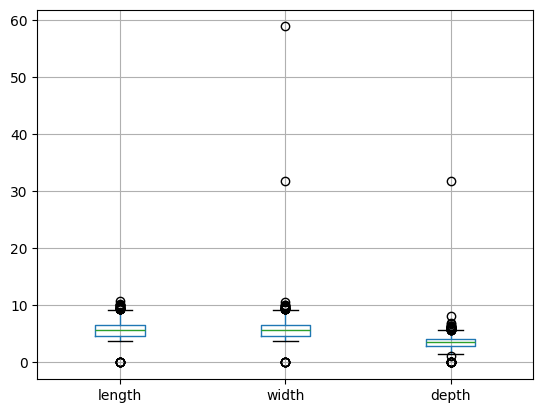

In [ ]:
df.boxplot(['length','width','depth']) #box plots show that values past 30 skew the data immensely

In [ ]:
#drop the values of length, width, and depth that don't make sense and skew the data (=0 or >30)
#inplace = True reassigns 'df' to correct values.
df.drop(df[(df['length'] < 0.001) | (df['length'] > 30)].index, inplace=True)
df.drop(df[(df['width'] < 0.001) | (df['width'] > 30)].index, inplace=True)
df.drop(df[(df['depth'] < 0.001) | (df['depth'] > 30)].index, inplace=True)

df.describe() #doesn't affect encoded variables much

,diamond id,carat,depth percent,table,price,length,width,depth,cut encoded,clarity encoded,color encoded
count,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000
mean,26971.599904,0.797687,61.749565,57.456939,3930.910474,5.731605,5.733428,3.539409,2.904223,3.051505,3.405939
std,15571.129462,0.473777,1.432318,2.234069,3987.215003,1.119402,1.111272,0.691620,1.116593,1.647017,1.701281
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000,0.000000
25%,13487.000000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2.000000,2.000000,2.000000
50%,26973.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000,3.000000
75%,40456.000000,1.040000,62.500000,59.000000,5323.000000,6.540000,6.540000,4.040000,4.000000,4.000000,5.000000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000,4.000000,7.000000,6.000000


<Axes: >

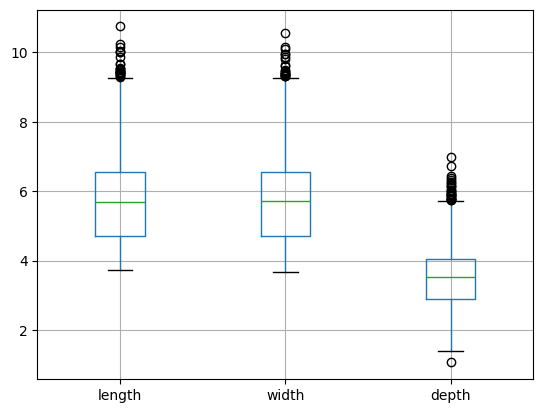

In [ ]:
df.boxplot(['length','width','depth'])

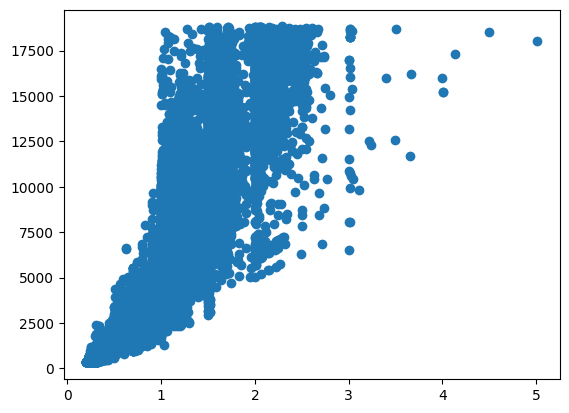

In [ ]:
plt.scatter(df['carat'],df['price'])

In [ ]:
df.corr()

#ASK MENTOR: how is cut,clarity, and color negativly coorelated to price, and why so weak?
#POSSIBLE QUESTION: why is this the case, is it due to ordinal encoding?

#looks like for price: carat, length, width, and depth are the most coorelated.
#proabably can drop width and depth since length, width, and depth are so coorelated and having all is redundant

,diamond id,carat,depth percent,table,price,length,width,depth,cut encoded,clarity encoded,color encoded
diamond id,1.000000,-0.378172,-0.035069,-0.100819,-0.307085,-0.406330,-0.407242,-0.409204,0.096584,0.208581,0.095016
carat,-0.378172,1.000000,0.028357,0.181646,0.921586,0.977778,0.976860,0.976478,-0.134966,-0.352716,-0.291326
depth percent,-0.035069,0.028357,1.000000,-0.295758,-0.010653,-0.024940,-0.028075,0.096741,-0.218081,-0.067508,-0.047407
table,-0.100819,0.181646,-0.295758,1.000000,0.127241,0.196096,0.189942,0.155904,-0.433322,-0.160243,-0.026445
price,-0.307085,0.921586,-0.010653,0.127241,1.000000,0.887221,0.888818,0.882107,-0.053497,-0.146741,-0.172394
length,-0.406330,0.977778,-0.024940,0.196096,0.887221,1.000000,0.998657,0.991077,-0.126242,-0.372830,-0.270638
width,-0.407242,0.976860,-0.028075,0.189942,0.888818,0.998657,1.000000,0.990730,-0.125870,-0.367494,-0.270447
depth,-0.409204,0.976478,0.096741,0.155904,0.882107,0.991077,0.990730,1.000000,-0.152468,-0.376418,-0.274934
cut encoded,0.096584,-0.134966,-0.218081,-0.433322,-0.053497,-0.126242,-0.125870,-0.152468,1.000000,0.189160,0.020516
clarity encoded,0.208581,-0.352716,-0.067508,-0.160243,-0.146741,-0.372830,-0.367494,-0.376418,0.189160,1.000000,-0.025824


<Axes: >

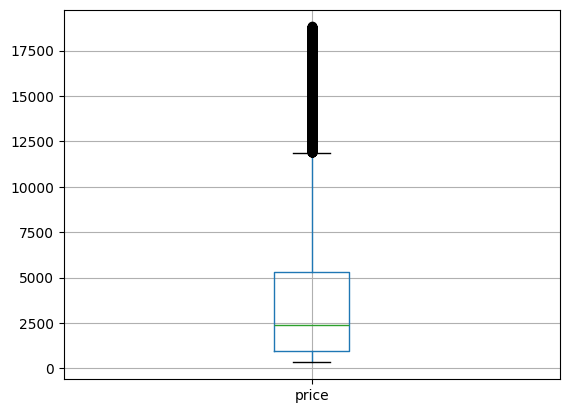

In [ ]:
df.boxplot('price') #boxplot shows that price is very wide, will remove outliers of IQR *1.5 (>q3 or <q1)

MY RESEARCH QUESTION CURRENTLY: WHICH DIAMOND FEATURES ARE MOST IMPORTANT FOR PRICE AND HOW CAN WE USE THOSE TO PREDICT PRICING?

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['price'] < Q1 - 1.5 * IQR) | (df['price'] > Q3 + 1.5 * IQR)]
print("10. Detecting Outliers:")

outliers.info() #505 outliers in dataframe
df = df[~((df['price'] < Q1 - 1.5 * IQR) | (df['price'] > Q3 + 1.5 * IQR))]
df

10. Detecting Outliers:
<class 'pandas.core.frame.DataFrame'>
Index: 3531 entries, 23820 to 27749
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diamond id       3531 non-null   int64  
 1   carat            3531 non-null   float64
 2   depth percent    3531 non-null   float64
 3   table            3531 non-null   float64
 4   price            3531 non-null   int64  
 5   length           3531 non-null   float64
 6   width            3531 non-null   float64
 7   depth            3531 non-null   float64
 8   cut encoded      3531 non-null   float64
 9   clarity encoded  3531 non-null   float64
 10  color encoded    3531 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 331.0 KB


,diamond id,carat,depth percent,table,price,length,width,depth,cut encoded,clarity encoded,color encoded
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,4.0,1.0,5.0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,3.0,2.0,5.0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,4.0,5.0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,3.0,3.0,1.0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,4.0,2.0,6.0
53936,53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,1.0,2.0,6.0
53937,53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,2.0,2.0,6.0
53938,53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,3.0,1.0,2.0


<Axes: >

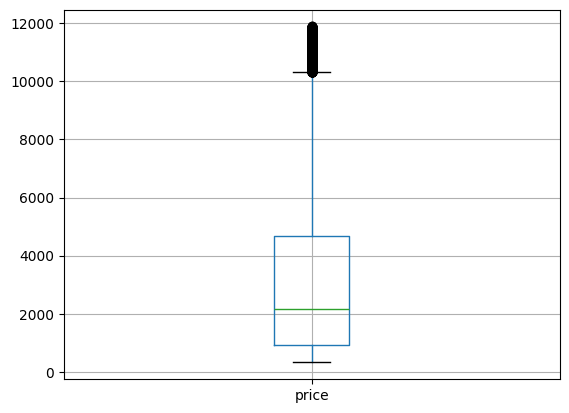

In [ ]:
df.boxplot('price')

In [ ]:
df = df.drop(columns = 'diamond id') #not needed

In [ ]:
df.corr() #seems like removing ouliers still doesn't improve coorelation for cut, clarity, and color

,carat,depth percent,table,price,length,width,depth,cut encoded,clarity encoded,color encoded
carat,1.000000,0.046520,0.183594,0.915872,0.982623,0.981435,0.981404,-0.162432,-0.376931,-0.267181
depth percent,0.046520,1.000000,-0.291911,0.004170,-0.015886,-0.019368,0.117372,-0.222000,-0.070594,-0.052011
table,0.183594,-0.291911,1.000000,0.128096,0.194015,0.187093,0.150196,-0.435506,-0.160172,-0.017089
price,0.915872,0.004170,0.128096,1.000000,0.897484,0.899241,0.891834,-0.074698,-0.156241,-0.149001
length,0.982623,-0.015886,0.194015,0.897484,1.000000,0.998343,0.989295,-0.144071,-0.389560,-0.243942
width,0.981435,-0.019368,0.187093,0.899241,0.998343,1.000000,0.988875,-0.143458,-0.383766,-0.243791
depth,0.981404,0.117372,0.150196,0.891834,0.989295,0.988875,1.000000,-0.173082,-0.392973,-0.249017
cut encoded,-0.162432,-0.222000,-0.435506,-0.074698,-0.144071,-0.143458,-0.173082,1.000000,0.192123,0.020857
clarity encoded,-0.376931,-0.070594,-0.160172,-0.156241,-0.389560,-0.383766,-0.392973,0.192123,1.000000,-0.046871
color encoded,-0.267181,-0.052011,-0.017089,-0.149001,-0.243942,-0.243791,-0.249017,0.020857,-0.046871,1.000000


Below are some data visualizations now that dataframe is mostly filtered

Text(0, 0.5, 'price')

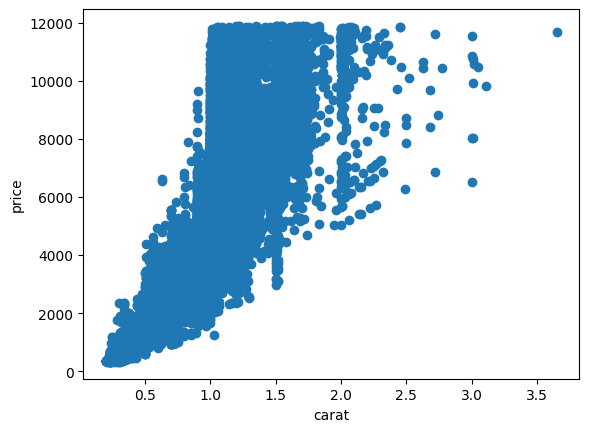

In [ ]:
plt.scatter(df['carat'],df['price'])
plt.xlabel('carat')
plt.ylabel('price')

Text(0, 0.5, 'price')

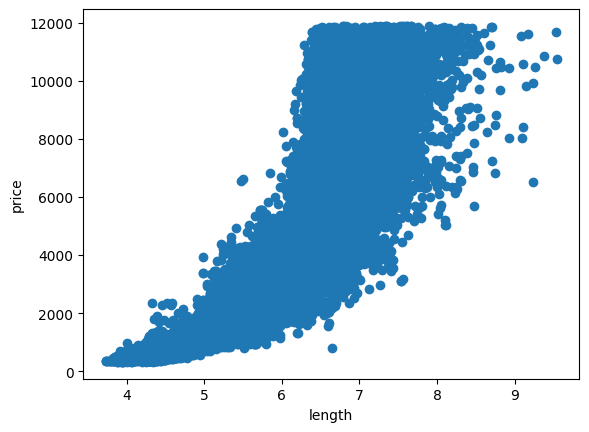

In [ ]:
plt.scatter(df['length'],df['price'])
plt.xlabel('length')
plt.ylabel('price')

<Axes: >

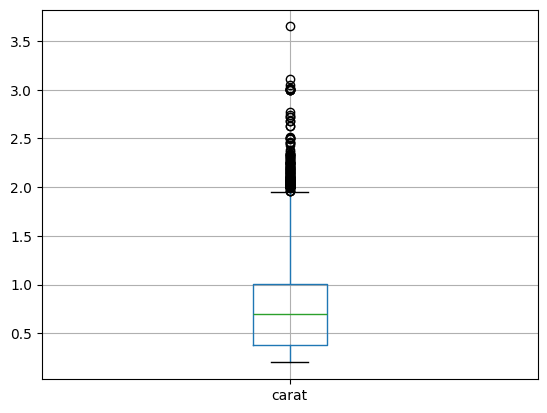

In [ ]:
df.boxplot('carat')

Text(0.5, 1.0, 'price vs enteries')

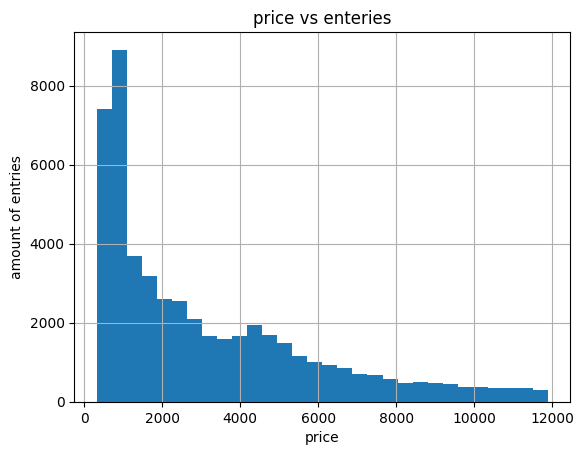

In [ ]:
df['price'].hist(bins=30)
plt.xlabel('price')
plt.ylabel('amount of entries')
plt.title('price vs enteries')


In [ ]:
df.groupby(pd.qcut(df['carat'], 5))[['cut encoded', 'clarity encoded', 'color encoded']].mean() #cut, color, and clarity get worse are carat increases


,cut encoded,clarity encoded,color encoded
carat,,,
"(0.199, 0.34]",3.146858,4.025407,3.691079
"(0.34, 0.52]",3.055041,3.482877,3.862921
"(0.52, 0.75]",2.958852,3.053482,3.677193
"(0.75, 1.04]",2.494974,2.403533,3.478091
"(1.04, 3.65]",2.870690,2.368966,2.524645


In [ ]:
df['volume'] = df['length'] * df['width'] * df['depth']
df.groupby(pd.qcut(df['volume'], 5))[['cut encoded', 'clarity encoded', 'color encoded']].mean() #cut, color, and clarity get worse are volume increases

,cut encoded,clarity encoded,color encoded
volume,,,
"(31.706999999999997, 56.294]",3.137527,4.037210,3.689621
"(56.294, 84.893]",3.041274,3.493303,3.850084
"(84.893, 123.312]",2.985211,3.082878,3.690223
"(123.312, 170.391]",2.476233,2.382753,3.483477
"(170.391, 576.397]",2.889947,2.389302,2.549866


UPDATED RESEARCH QUESTION: WHY IS THE COORELATION OF CUT, CLARITY, AND COLOR SO POOR WHEN PREDICTING PRICING AND HOW CAN DIFFERENT ENCODING MODELS BE USED TO IMPROVE THIS?

* see coorelation through visualizations
* use different feature encoding teqniches: ordinal, label, One-Hot, Dummy
* create linear regression models for clarity, cut, and color for each encoding method to show how poor they are at predicting target (pricing) compared with a similar model with features: carat and length to show immense difference




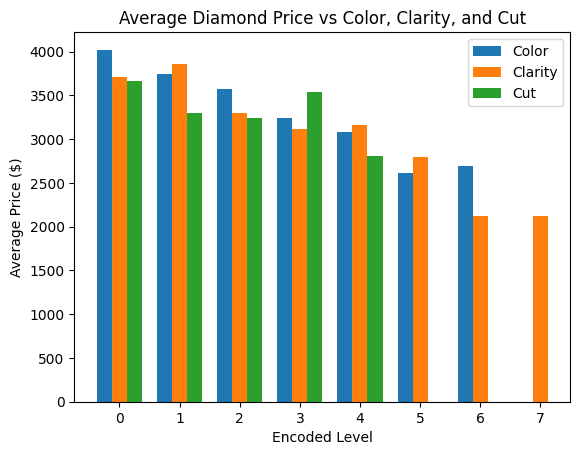

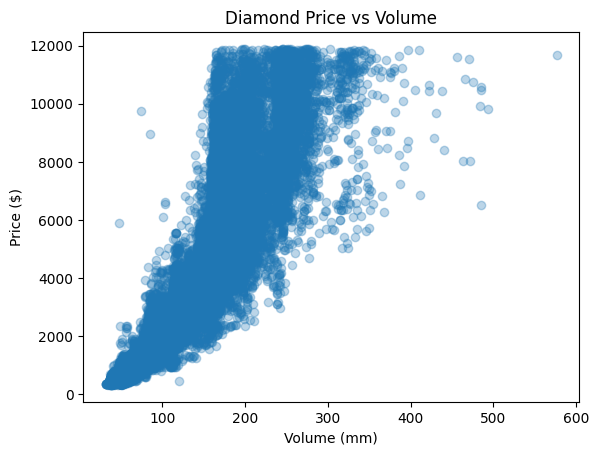

In [ ]:
#LIGHTNING TALK CODE/VISUALIZATIONS
avg_clarity_price= df.groupby('clarity encoded')['price'].mean()
avg_color_price= df.groupby('color encoded')['price'].mean()
avg_cut_price= df.groupby('cut encoded')['price'].mean()


plt.bar(avg_color_price.index-0.25,avg_color_price, width = 0.25, label = 'Color')
plt.bar(avg_clarity_price.index,avg_clarity_price, width = 0.25, label = "Clarity")
plt.bar(avg_cut_price.index + 0.25,avg_cut_price, width = 0.25, label = 'Cut')

plt.legend()
plt.xlabel('Encoded Level')
plt.ylabel('Average Price ($)')
plt.title('Average Diamond Price vs Color, Clarity, and Cut')
plt.show()

plt.scatter(df['volume'],df['price'], alpha = 0.3)
plt.xlabel('Volume (mm)')
plt.ylabel('Price ($)')
plt.title('Diamond Price vs Volume')
plt.show()






In [ ]:
#This is an ANOVA test that compares multiple encoded levels to each other finding p value and stating weather the comparison is significant or not.
#We then use a tukey HSD to display the results

# Significance level: 5%
# NULL HYPOTHESIS: There is no significant difference in mean price between clarity levels
#ALTERNATIVE HYPTHESIS: At least one clarity, color, or cut level has a significantly different mean price.


#Through the test we see that often p-value is <5% meaning these features do have an significant impact on price. Therefore, our null hypothesis is rejected.
#Interestingly, like seen in the average price per level graph above, we see that for the categorical features, higher levels does not coorelate to higher prices,
#infact it is the opposite with mean prices decreasing as level improves

#clarity
comp = mc.MultiComparison(df['price'],df['clarity encoded'])
result = comp.tukeyhsd()
print(result.summary())
print('')

#color
comp = mc.MultiComparison(df['price'],df['color encoded'])
result = comp.tukeyhsd()
print(result.summary())
print('')

#cut
comp = mc.MultiComparison(df['price'],df['cut encoded'])
result = comp.tukeyhsd()
print(result.summary())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   0.0    1.0   148.4967 0.8554  -171.8681   468.8616  False
   0.0    2.0  -415.1023 0.0018   -731.136   -99.0686   True
   0.0    3.0  -594.2384    0.0  -910.9378   -277.539   True
   0.0    4.0  -552.3936    0.0  -873.6193  -231.1679   True
   0.0    5.0  -918.4102    0.0 -1247.6509  -589.1696   True
   0.0    6.0 -1589.4801    0.0 -1926.5639 -1252.3963   True
   0.0    7.0   -1584.85    0.0 -1951.9887 -1217.7112   True
   1.0    2.0   -563.599    0.0  -681.4209  -445.7772   True
   1.0    3.0  -742.7351    0.0   -862.331  -623.1392   True
   1.0    4.0  -700.8903    0.0  -832.0034  -569.7773   True
   1.0    5.0  -1066.907    0.0 -1216.5869   -917.227   True
   1.0    6.0 -1737.9768    0.0    -1904.2 -1571.7536   True
   1.0    7.0 -1733.3467    0.0 -1954.2439 -1512.4495   True
   2.0    3.0  -179.1361

mean squared:  7197504.324959805
mean absolute:  2087.945227926437
R2 score:  0.047813211669656464


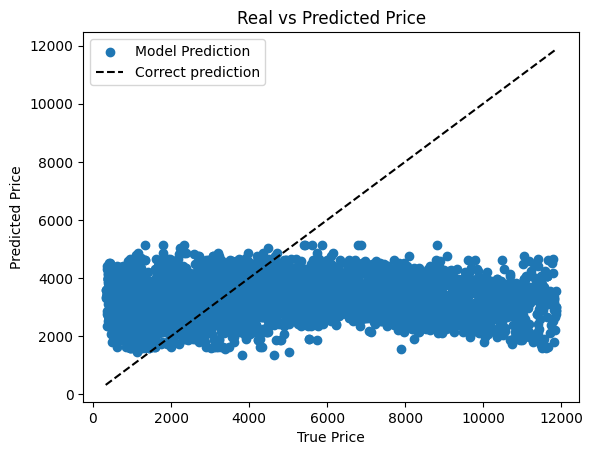

In [ ]:
#ORDINAL ENCODING LINEAR REGRESSION ML MODEL

#setting values
features = df[['cut encoded','color encoded','clarity encoded']]
label = df['price']

#train/test data splitting
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2,random_state = 3)

#initialize model
lr_model = LinearRegression()

#fit model
lr_model.fit(X_train, y_train)

#test model on test data
pred = lr_model.predict(X_test)

#Plot model predictions
plt.scatter(y_test, pred, label = 'Model Prediction')

#Plot correct predictions
MIN_VALUE = df['price'].min()
MAX_VALUE = df['price'].max()
plt.plot([MIN_VALUE, MAX_VALUE], [MIN_VALUE, MAX_VALUE], '--k', label="Correct prediction")

#labels for graph
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title("Real vs Predicted Price")
plt.legend()

#Evaluating the Model
print('mean squared: ', mean_squared_error(y_test, pred))
print('mean absolute: ', mean_absolute_error(y_test, pred)) #model is off on average by $2087
print('R2 score: ', r2_score(y_test, pred)) #very bad r^2 value, although clarity, cut, color are significant for the variance of price, as seen in ANOVA test, they have no predicting power.

#I am now wondering if the more expensive diamonds are skewing the data. I will see how model reacts when only predicting diamonds >5k

Text(0.5, 1.0, 'Ordinal Encoding Residual Plot')

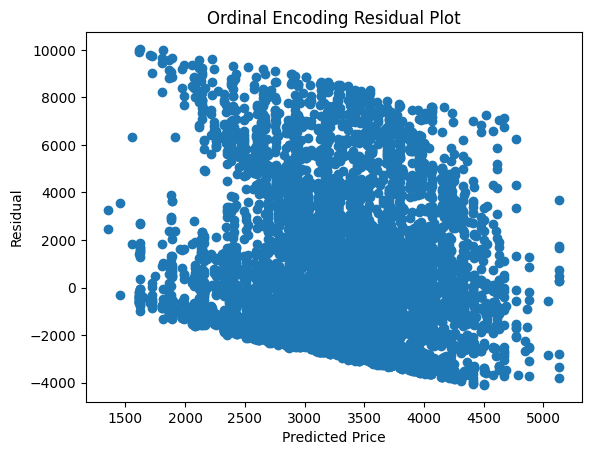

In [ ]:
residuals = y_test - pred
plt.scatter(pred, residuals)
plt.xlabel('Predicted Price')
plt.ylabel('Residual')
plt.title('Ordinal Encoding Residual Plot')



mean squared:  21319.87507608033
mean absolute:  120.40470945414876
R2 score:  0.17572465542220583


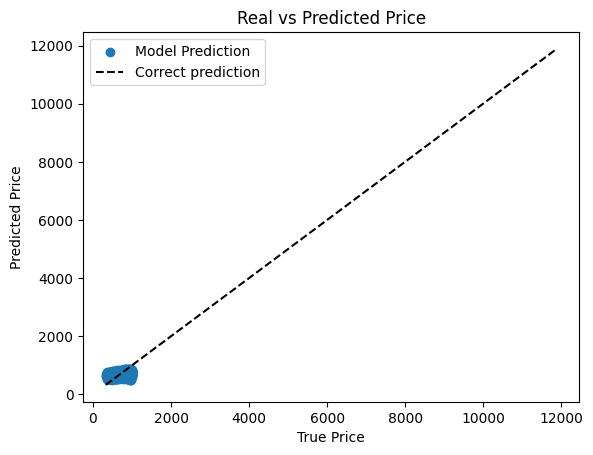

In [ ]:
# <5k PRICE ORDINAL ENCODING LINEAR REGRESSION ML MODEL

#setting values
df_sample = df[df['price'] < 1000]
features_sample = df_sample[['cut encoded','color encoded','clarity encoded']]
label_sample = df_sample['price']



#train/test data splitting
X_train_sample, X_test_sample, y_train_sample, y_test_sample = model_selection.train_test_split(features_sample, label_sample, test_size=0.2, random_state=3)

#initialize model
lr_model = LinearRegression()

#fit model
lr_model.fit(X_train_sample, y_train_sample)

#test model on test data
pred_sample = lr_model.predict(X_test_sample)

#Plot model predictions
plt.scatter(y_test_sample, pred_sample, label = 'Model Prediction')

#Plot correct predictions
MIN_VALUE = df['price'].min()
MAX_VALUE = df['price'].max()
plt.plot([MIN_VALUE, MAX_VALUE], [MIN_VALUE, MAX_VALUE], '--k', label="Correct prediction")

#labels for graph
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title("Real vs Predicted Price")
plt.legend()

#Evaluating the Model
print('mean squared: ', mean_squared_error(y_test_sample, pred_sample))
print('mean absolute: ', mean_absolute_error(y_test_sample, pred_sample)) #model is off on average by $1030
print('R2 score: ', r2_score(y_test_sample, pred_sample))
#seems like there is a very weak positive coorelation,
#which makes me think that for cheaper diamonds (that are usually small/lower carat) color, clarity, and cut don't matter much more than expensive diamonds

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50386 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carat            50386 non-null  float64
 1   depth percent    50386 non-null  float64
 2   table            50386 non-null  float64
 3   price            50386 non-null  int64  
 4   length           50386 non-null  float64
 5   width            50386 non-null  float64
 6   depth            50386 non-null  float64
 7   cut encoded      50386 non-null  float64
 8   clarity encoded  50386 non-null  float64
 9   color encoded    50386 non-null  float64
 10  volume           50386 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 4.6 MB


Text(0.5, 1.0, 'Ordinal Encoding SAMPLE Residual Plot')

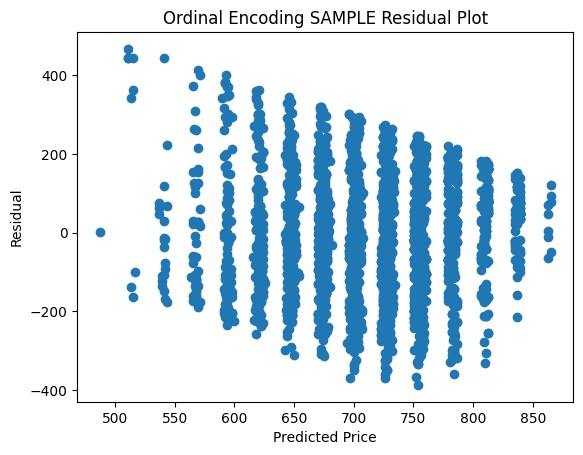

In [ ]:
residuals_sample = y_test_sample - pred_sample
plt.scatter(pred_sample, residuals_sample)
plt.xlabel('Predicted Price')
plt.ylabel('Residual')
plt.title('Ordinal Encoding SAMPLE Residual Plot')


In [ ]:
#I want to see how a model would react to another encoding method
#DUMMY ENCODING CUT, COLOR, CLARITY

#clarity
dummy_clarity = pd.get_dummies(df['clarity encoded'])
dummy_clarity.columns = ['clarity 0','clarity 1','clarity 2','clarity 3','clarity 4','clarity 5','clarity 6','clarity 7']
df = pd.concat([df, dummy_clarity], axis=1)

#color
dummy_color = pd.get_dummies(df['color encoded'])
dummy_color.columns = ['color 0','color 1','color 2','color 3','color 4','color 5','color 6']
df = pd.concat([df, dummy_color], axis=1)
df.head()

#cut
dummy_cut = pd.get_dummies(df['cut encoded'])
dummy_cut.columns = ['cut 0','cut 1','cut 2','cut 3','cut 4']
df = pd.concat([df, dummy_cut], axis=1)

df.drop(['clarity 0', 'color 0','cut 0'], axis=1, inplace=True)
df.sample(5)

,carat,depth percent,table,price,length,width,depth,cut encoded,clarity encoded,color encoded,...,color 1,color 2,color 3,color 4,color 5,color 6,cut 1,cut 2,cut 3,cut 4
38660,0.42,61.9,59.0,1040,4.81,4.76,2.96,3.0,2.0,6.0,...,False,False,False,False,False,True,False,False,True,False
40424,0.43,60.8,57.0,1135,4.90,4.87,2.97,4.0,5.0,5.0,...,False,False,False,False,True,False,False,False,False,True
32615,0.34,61.6,56.0,457,4.47,4.51,2.76,2.0,3.0,1.0,...,True,False,False,False,False,False,False,True,False,False
48662,0.55,61.2,57.0,2001,5.28,5.30,3.24,4.0,4.0,5.0,...,False,False,False,False,True,False,False,False,False,True
32820,0.34,62.5,57.0,805,4.40,4.47,2.77,4.0,3.0,6.0,...,False,False,False,False,False,True,False,False,False,True


Mean Squared Error:  7151147.175481214
Mean Absolute Error:  2078.6261645153627
R2 Score:  0.05394598537638362


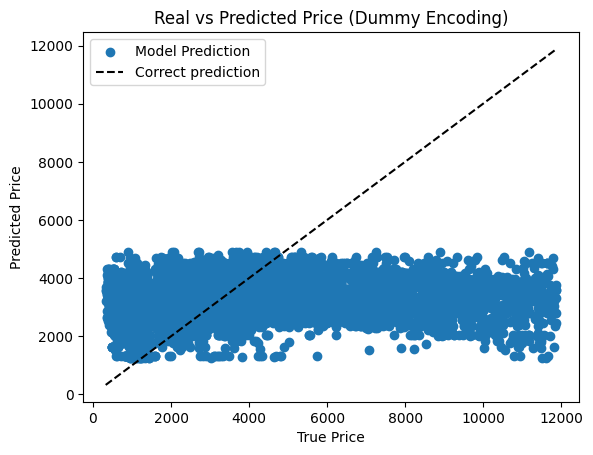

In [ ]:
#DUMMY ENCODING LINEAR REGRESSION ML MODEL

#setting values
features = df[['clarity 1','clarity 2','clarity 3','clarity 4','clarity 5','clarity 6','clarity 7',
               'color 1','color 2','color 3','color 4','color 5','color 6','cut 1','cut 2','cut 3','cut 4']]
label = df['price']

# Train/test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=3)

# Initialize model
lr_model = LinearRegression()

# Fit model
lr_model.fit(X_train, y_train)

# Predict
pred = lr_model.predict(X_test)

# Plot model predictions
plt.scatter(y_test, pred, label='Model Prediction')

# Plot correct predictions line
MIN_VALUE = df['price'].min()
MAX_VALUE = df['price'].max()
plt.plot([MIN_VALUE, MAX_VALUE], [MIN_VALUE, MAX_VALUE], '--k', label="Correct prediction")

# Labels for graph
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title("Real vs Predicted Price (Dummy Encoding)")
plt.legend()


# Evaluate the Model
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('R2 Score: ', r2_score(y_test, pred))

Text(0.5, 1.0, 'Dummy Encoding Residual Plot')

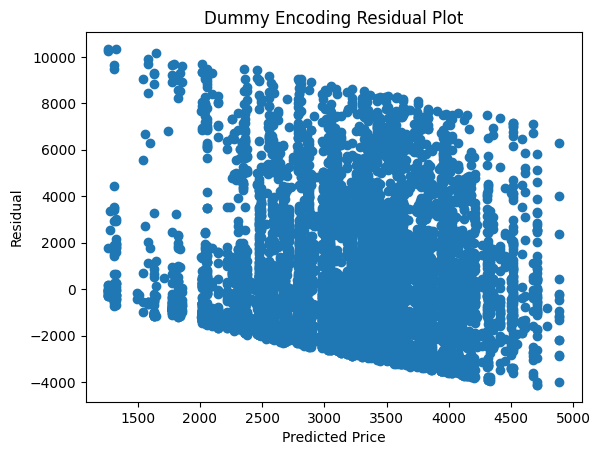

In [ ]:
residuals = y_test - pred
plt.scatter(pred, residuals)
plt.xlabel('Predicted Price')
plt.ylabel('Residual')
plt.title('Dummy Encoding Residual Plot')



mean squared:  19890.20655745223
mean absolute:  115.53774468930155
R2 score:  0.23099892446078674


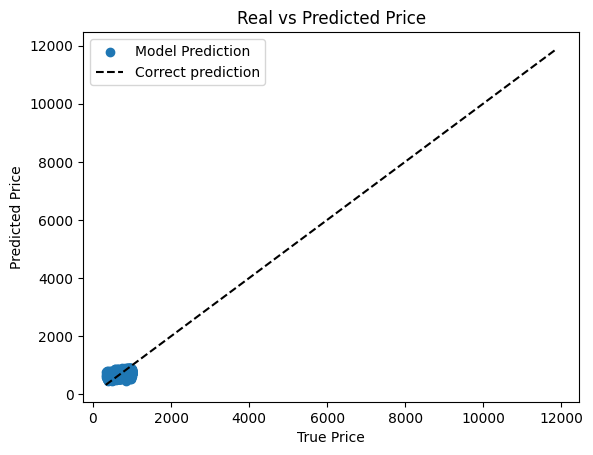

In [ ]:
# <5k PRICE DUMMY ENCODING LINEAR REGRESSION ML MODEL

#setting values
df_sample = df[df['price'] < 1000]
features_sample = df_sample[['clarity 1','clarity 2','clarity 3','clarity 4','clarity 5','clarity 6','clarity 7',
               'color 1','color 2','color 3','color 4','color 5','color 6','cut 1','cut 2','cut 3','cut 4']]
label_sample = df_sample['price']



#train/test data splitting
X_train_sample, X_test_sample, y_train_sample, y_test_sample = model_selection.train_test_split(features_sample, label_sample, test_size=0.2, random_state=3)

#initialize model
lr_model = LinearRegression()

#fit model
lr_model.fit(X_train_sample, y_train_sample)

#test model on test data
pred_sample = lr_model.predict(X_test_sample)

#Plot model predictions
plt.scatter(y_test_sample, pred_sample, label = 'Model Prediction')

#Plot correct predictions
MIN_VALUE = df['price'].min()
MAX_VALUE = df['price'].max()
plt.plot([MIN_VALUE, MAX_VALUE], [MIN_VALUE, MAX_VALUE], '--k', label="Correct prediction")

#labels for graph
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title("Real vs Predicted Price")
plt.legend()

#Evaluating the Model
print('mean squared: ', mean_squared_error(y_test_sample, pred_sample))
print('mean absolute: ', mean_absolute_error(y_test_sample, pred_sample)) #model is off on average by $1006
print('R2 score: ', r2_score(y_test_sample, pred_sample))
#seems like there is a very weak positive coorelation,
#which makes me think that for cheaper diamonds (that are usually small/lower carat) color, clarity, and cut don't matter much more than expensive diamonds

Text(0.5, 1.0, 'Dummy Encoding SAMPLE Residual Plot')

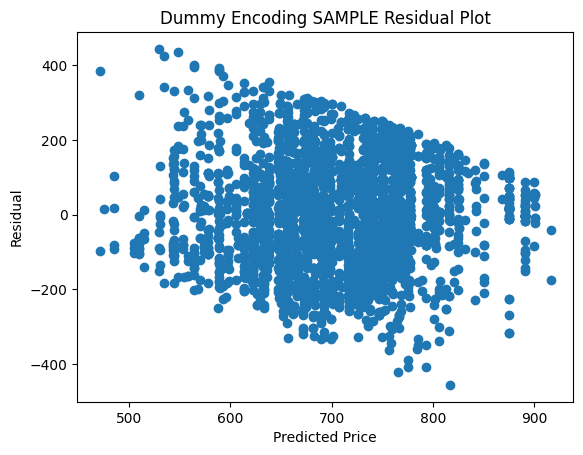

In [ ]:
residuals_sample = y_test_sample - pred_sample
plt.scatter(pred_sample, residuals_sample)
plt.xlabel('Predicted Price')
plt.ylabel('Residual')
plt.title('Dummy Encoding SAMPLE Residual Plot')


TAKEAWAY FROM MODELS:

 1. The 3C's (Color, Cut, Clarity) have little coorelation to the price for diamonds,
 2. Different encoding models do not help improve coorelation
 3. Diamonds are overwhelmingly priced based on carat and price, basically making any other metric irrelevent to predicting price
 ------------------------------------------------------------------------------
 ''But why does this matter: so what?'':

 1. The diamond industry is misleading people to believing these features matter for price when in reality they don't
 2. For example, if someone is debating between purchasing 2 similar priced diamonds, with one being higher carat and one having a nicer color, a person may be fooled into thinking the one with a nicer color is a better deal and more worth the money.
 3. Marketing influences that push the 3C's could make consumers make bad purchases, overpaying for features that barely't affect market price

Final Visualizations that will go in my poster/slideshow most likely

Text(0.5, 1.0, 'Correlation Heatmap of Diamond Features')

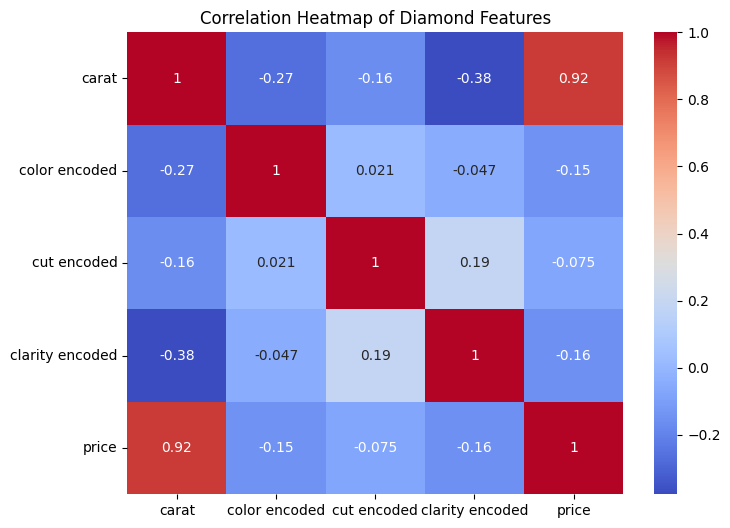

In [ ]:
heatmap_data = df[['carat', 'color encoded', 'cut encoded', 'clarity encoded', 'price']]
heatmap_datacorr = heatmap_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_datacorr, cmap ='coolwarm', annot = True)
plt.title("Correlation Heatmap of Diamond Features")



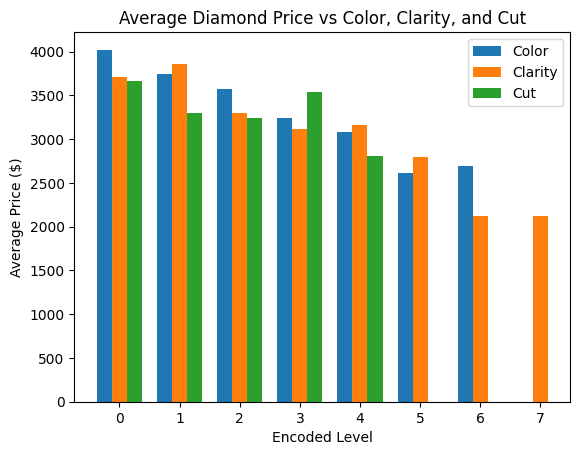

In [ ]:
avg_clarity_price= df.groupby('clarity encoded')['price'].mean()
avg_color_price= df.groupby('color encoded')['price'].mean()
avg_cut_price= df.groupby('cut encoded')['price'].mean()


plt.bar(avg_color_price.index-0.25,avg_color_price, width = 0.25, label = 'Color')
plt.bar(avg_clarity_price.index,avg_clarity_price, width = 0.25, label = "Clarity")
plt.bar(avg_cut_price.index + 0.25,avg_cut_price, width = 0.25, label = 'Cut')

plt.legend()
plt.xlabel('Encoded Level')
plt.ylabel('Average Price ($)')
plt.title('Average Diamond Price vs Color, Clarity, and Cut')
plt.show()


Text(0.5, 1.0, 'Carat vs Price Scatter Plot')

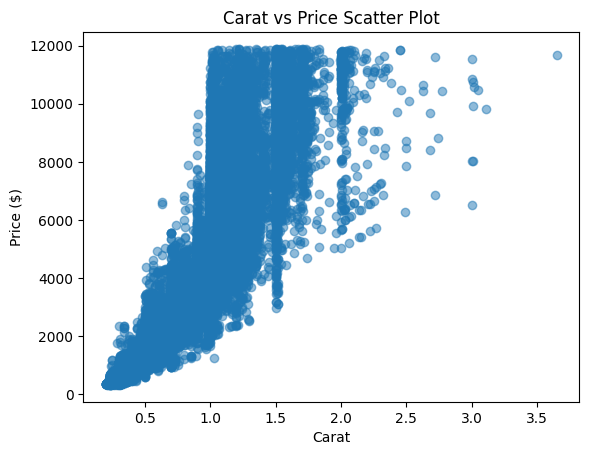

In [ ]:
plt.scatter(df['carat'],df['price'], alpha = 0.5)
plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.title('Carat vs Price Scatter Plot')


Text(0.5, 1.0, 'Price vs Number of Diamonds')

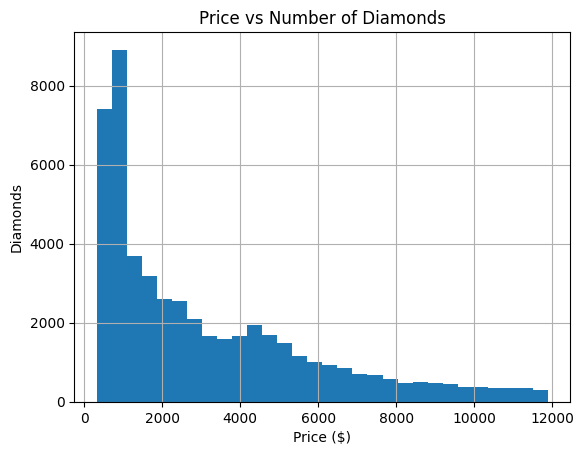

In [ ]:
df['price'].hist(bins=30)
plt.xlabel('Price ($)')
plt.ylabel('Diamonds')
plt.title('Price vs Number of Diamonds')
